In [88]:
import pandas as pd
import numpy as np

In [89]:
dataSet = pd.read_csv("Alzheimer.csv")
dataSet

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
1,51676,Bachelor,61.0,0,0,Yes,Freelance,High,202.21,NaN,never smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,Secondary School,82.0,1,0,Yes,Freelance,High,71.97,28.3,never smoked,0
4096,14180,Bachelor,13.0,0,0,No,Farmer,High,103.08,18.6,Unknown,0
4097,44873,Bachelor,81.0,0,0,Yes,Freelance,Normal,125.20,40.0,never smoked,0
4098,19723,Bachelor,35.0,0,0,Yes,Freelance,High,82.99,30.6,never smoked,0


# MARK: Data Processing

In [90]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              4100 non-null   int64  
 1   Education       4100 non-null   object 
 2   age             4100 non-null   float64
 3   hypertension    4100 non-null   int64  
 4   heart_disease   4100 non-null   int64  
 5   family history  4100 non-null   object 
 6   Occupation      4100 non-null   object 
 7   Triglycerides   4100 non-null   object 
 8   Blood Sugar     4100 non-null   float64
 9   BMI             3936 non-null   float64
 10  smoking_status  4100 non-null   object 
 11  alzheimer       4100 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 384.5+ KB


In [91]:
dataSet.isna().sum()

HN                  0
Education           0
age                 0
hypertension        0
heart_disease       0
family history      0
Occupation          0
Triglycerides       0
Blood Sugar         0
BMI               164
smoking_status      0
alzheimer           0
dtype: int64

### MARK: เลือกที่จะ drop ทิ้งเพราะว่า Null มีจำนวนไม่เยอะมาก ไม่มีผลต่อ data เท่าที่ควร และ ไม่สามารถหาค่า BMI มาแทนที่ได้เพราะไม่มี weight และ height ของผู้ป่วย

In [92]:
dataSet = dataSet.dropna()
dataSet.isna().sum()

HN                0
Education         0
age               0
hypertension      0
heart_disease     0
family history    0
Occupation        0
Triglycerides     0
Blood Sugar       0
BMI               0
smoking_status    0
alzheimer         0
dtype: int64

### MARK: ตรวจสอบ Class Target จำนวนเหมาะสมกันหรือไม่

In [93]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 1, "alzheimer"]))

Target == 1 -> 202


In [94]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 0, "alzheimer"]))

Target == 1 -> 3734


### MARK: ปรับข้อมูล เป็น 0,1

In [95]:
dataSet.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
5,66889,Secondary School,81.0,0,0,Yes,Private,Normal,186.21,29.0,formerly smoked,1


In [96]:
dataSet['Education'].unique()

array(['Secondary School', 'Bachelor'], dtype=object)

In [97]:
dataSet["Education"] = dataSet["Education"].replace({'Bachelor': 1, 'Secondary School': 0})

/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_97258/1587614070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet["Education"] = dataSet["Education"].replace({'Bachelor': 1, 'Secondary School': 0})


In [98]:
dataSet['family history'].unique()

array(['Yes', 'No'], dtype=object)

In [99]:
dataSet["family history"] = dataSet["family history"].replace({'Yes': 1, 'No': 0})

/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_97258/2561453130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet["family history"] = dataSet["family history"].replace({'Yes': 1, 'No': 0})


In [100]:
dataSet['Occupation'].unique()

array(['Private', 'Freelance', 'Officer', 'Farmer', 'Never_worked'],
      dtype=object)

In [101]:
dataSet["Occupation"] = dataSet["Occupation"].replace({'Private': 0
                                                       , 'Freelance': 1
                                                       , "Officer":2
                                                       , "Farmer":3
                                                       , "Never_worked":4})

/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_97258/3379441214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet["Occupation"] = dataSet["Occupation"].replace({'Private': 0


In [102]:
dataSet['Triglycerides'].unique()

array(['Normal', 'High'], dtype=object)

In [103]:
dataSet['Triglycerides'] = dataSet['Triglycerides'].replace({'High': 1,'Normal': 0})

/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_97258/956614456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Triglycerides'] = dataSet['Triglycerides'].replace({'High': 1,'Normal': 0})


In [104]:
dataSet["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [105]:
dataSet["smoking_status"] = dataSet["smoking_status"].replace({'formerly smoked': 0
                                                               , 'never smoked': 1
                                                               , "smokes":2
                                                               , "Unknown":3})

/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_97258/1295391749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet["smoking_status"] = dataSet["smoking_status"].replace({'formerly smoked': 0


In [106]:
dataSet

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,0,67.0,0,1,1,0,0,228.69,36.6,0,1
2,35112,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,67182,1,49.0,0,0,1,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.0,1,1
5,66889,0,81.0,0,0,1,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,0,82.0,1,0,1,1,1,71.97,28.3,1,0
4096,14180,1,13.0,0,0,0,3,1,103.08,18.6,3,0
4097,44873,1,81.0,0,0,1,1,0,125.20,40.0,1,0
4098,19723,1,35.0,0,0,1,1,1,82.99,30.6,1,0


### SMOTE (Synthetic Minority Over-sampling Technique): วิธีการที่ใช้การสร้างตัวอย่างสัญญาณเทียบเท่าจากคลาสน้อยโดยการผสมคุณลักษณะของตัวอย่างในคลาสน้อย

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
X = dataSet.drop('alzheimer', axis=1)
y = dataSet['alzheimer']

# สร้างตัวกำหนด SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' จะทำให้คลาสน้อยมีจำนวนเทียบเท่าคลาสมาก

# ทำ SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# แสดง Dataframe หลังจากทำ SMOTE
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
resampled_df

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,0,67.000000,0,1,1,0,0,228.690000,36.600000,0,1
1,35112,0,80.000000,0,1,1,0,1,105.920000,32.500000,1,1
2,67182,1,49.000000,0,0,1,0,0,171.230000,34.400000,2,1
3,1665,1,79.000000,1,0,1,1,1,174.120000,24.000000,1,1
4,66889,0,81.000000,0,0,1,0,0,186.210000,29.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7463,30672,1,75.191424,0,0,1,0,1,194.120077,26.485145,2,1
7464,24693,1,72.881772,1,0,1,0,0,96.711335,23.964137,0,1
7465,54110,0,77.381014,0,1,0,1,0,242.308074,30.616399,0,1
7466,14088,0,49.649492,0,0,0,1,0,145.680693,37.617562,1,1


# MARK: แบ่งข้อมูล

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### MARK: train_test_split

In [110]:
X = resampled_df.drop('alzheimer', axis=1)
y = resampled_df["alzheimer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state 42 เพื่อข้อมูลเหมือนกันทุกครั้ง

In [111]:
# ลองใช้ Class target เท่ากัน ดู
# dataSetSendModel = dataSet.loc[:(len(dataSet.loc[dataSet["alzheimer"] == 1, "alzheimer"])-1)*2]
# X = dataSet.drop('alzheimer', axis=1)
# y = dataSet["alzheimer"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
X_train.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status
292,40840,1,49.000000,0,0,1,0,1,138.160000,19.400000,1
2605,4964,1,72.000000,1,0,1,0,1,90.870000,22.100000,1
5993,1705,1,72.304009,1,0,1,0,0,153.572872,25.052227,1
4100,16994,1,75.825320,1,0,0,0,0,163.613265,23.688223,1
6130,49213,0,73.443849,0,0,1,0,0,105.123200,25.691007,2


In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5227 entries, 292 to 7270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              5227 non-null   int64  
 1   Education       5227 non-null   int64  
 2   age             5227 non-null   float64
 3   hypertension    5227 non-null   int64  
 4   heart_disease   5227 non-null   int64  
 5   family history  5227 non-null   int64  
 6   Occupation      5227 non-null   int64  
 7   Triglycerides   5227 non-null   int64  
 8   Blood Sugar     5227 non-null   float64
 9   BMI             5227 non-null   float64
 10  smoking_status  5227 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 490.0 KB


In [114]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5227 entries, 292 to 7270
Series name: alzheimer
Non-Null Count  Dtype
--------------  -----
5227 non-null   int64
dtypes: int64(1)
memory usage: 81.7 KB


# Model 1 Decision tree

### MARK: Decision tree model Start

In [115]:
clfModel = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced',random_state=42)

In [116]:
clfModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [117]:
clfModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [118]:
# feature ที่มีความสำคัญ
fImportances = pd.Series(clfModel.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fImportances

age               0.463188
HN                0.146503
Blood Sugar       0.091505
BMI               0.084030
Occupation        0.069614
smoking_status    0.061419
Triglycerides     0.032931
Education         0.018408
family history    0.013382
hypertension      0.009542
heart_disease     0.009477
dtype: float64

In [119]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel.score(X_train,y_train))
# อันเดียวกัน
# y_train_pred = clf.predict(X_train)
# accuracy_score(y_train, y_train_pred)

ตัวอย่างข้อมูลชุดเรียนรู้ -> 1.0


### MARK: Visualize Decision Tree

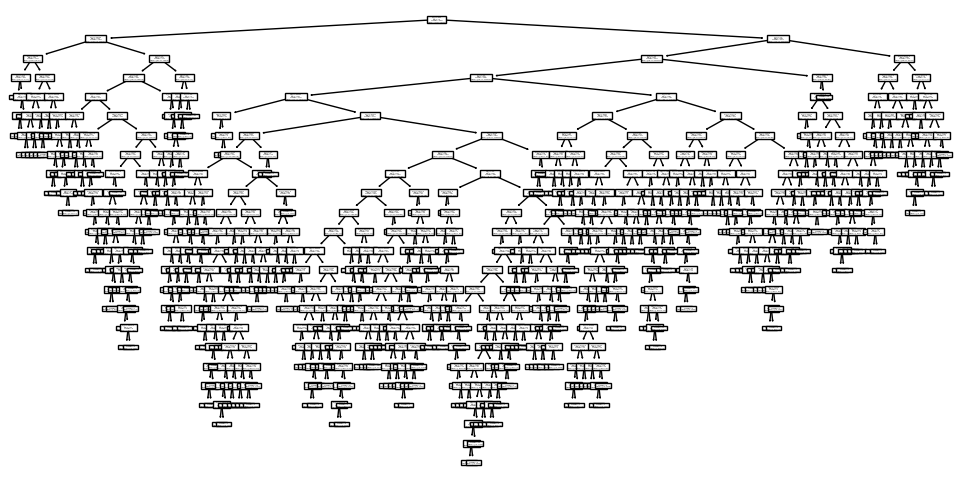

In [120]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel.fit(X_train, y_train))
plt.show()

### MARK: Predict and Score Model

In [121]:
y_pred = clfModel.predict(X_test)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.895136099955377


In [122]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,988,130
1,105,1018


In [124]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1118
           1       0.89      0.91      0.90      1123

    accuracy                           0.90      2241
   macro avg       0.90      0.90      0.90      2241
weighted avg       0.90      0.90      0.90      2241



In [129]:
from sklearn import metrics

In [131]:
acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
auc = metrics.roc_auc_score(y_test, y_pred)

print(f"Test set performance scores:\n"
      f"accuracy: {acc:.2f}\n"
      f"precision: {precision:.2f}\n"
      f"recall: {recall:.2f}\n"
      f"f1: {f1:.2f}\n"
      f"auc: {auc:.2f}\n"
     )


Test set performance scores:
accuracy: 0.90
precision: 0.90
recall: 0.90
f1: 0.90
auc: 0.90



### MARK: feature_importances

In [ ]:
np.array([X.columns.values.tolist(), list(clfModel.feature_importances_)]).T

In [ ]:
feature_names = X.columns.values.tolist()
importances = clfModel.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature_names")
plt.ylabel("Importances")
plt.title("Feature importances")
plt.show()

### MARK: ลอง Puring + เลือก Feature importances 4 อันดับแรก เข้า model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
feature_importances_Select = ['age', 'HN', 'Blood Sugar', 'BMI']

In [ ]:
X_feature_importances = resampled_df[feature_importances_Select]
y_feature_importances = y
X_trainIm, X_testIm, y_trainIm, y_testIm = train_test_split(X_feature_importances, y_feature_importances, test_size=0.3, random_state=42)

In [ ]:
best_score = 0

for md in range(1, 10): # iterate different maximum depth values
    # train the model
    treeModel = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', max_depth=md)
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainIm, y_trainIm, cv=10, scoring='accuracy')
   
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    print("cross_val_score ->",score)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

### MARK: Select Feature importances Top 4

In [ ]:
clfModel_Im = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', random_state=42)

In [ ]:
clfModel_Im.fit(X_trainIm, y_trainIm)

In [ ]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_Im.score(X_trainIm,y_trainIm))

In [ ]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_Im.fit(X_trainIm, y_trainIm))
plt.show()

In [ ]:
y_predIm = clfModel_Im.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

In [ ]:
pd.crosstab(y_testIm, y_predIm)

In [ ]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

### MARK: Select Feature + max_depth = best_parameter

In [ ]:
print("best_parameter max_depth -> ",best_parameter)

In [ ]:
clfModel_Im = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', max_depth=best_parameter, random_state=42)

In [ ]:
clfModel_Im.fit(X_trainIm, y_trainIm)

In [ ]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_Im.score(X_trainIm,y_trainIm))

In [ ]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_Im.fit(X_trainIm, y_trainIm))
plt.show()

In [ ]:
y_predIm = clfModel_Im.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

In [ ]:
pd.crosstab(y_testIm, y_predIm)

In [ ]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

# Model 2 K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

In [ ]:
accuracy_scores = []

### หา K ที่มีค่า accuracy ดีที่สุด

In [ ]:
for k in k_values:
    # สร้างโมเดล K-Nearest Neighbors ด้วยค่า K ปัจจุบัน
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # ทำการ Cross-validation และประเมินความถูกต้อง
    scores = cross_val_score(knn, X, y, cv=10) 
    accuracy = np.mean(scores)
    print("k",k,"->",accuracy)
    
    # เพิ่มค่าความถูกต้องลงในรายการ
    accuracy_scores.append(accuracy)

In [ ]:
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"ค่า K ที่ดีที่สุดคือ {best_k} ด้วยความถูกต้อง {best_accuracy:.2f}")

### MARK: ปรับ Scale

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### MARK: KNN Start

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k) 

In [ ]:
knn.get_params()

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
print("ตัวอย่างข้อมูลเรียนรู้ ->",knn.score(X_train,y_train))

### MARK: Predict and Score Model

In [ ]:
y_pred = knn.predict(X_test) 
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

### MARK: เลือก Feature importances 4 อันดับแรก เข้า model

In [ ]:
X_trainIm = scaler.fit_transform(X_trainIm)
X_testIm = scaler.fit_transform(X_testIm)

In [ ]:
knn.fit(X_trainIm, y_trainIm)
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",knn.score(X_trainIm,y_trainIm))

In [ ]:
y_predIm = knn.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

In [ ]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

# Model 3 Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

### MARK: Neural Network Start

In [ ]:
nnClf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [ ]:
nnClf.get_params()

In [ ]:
nnClf.fit(X_train,y_train)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",nnClf.score(X_train,y_train))

### MARK: Predict and Score Model

In [ ]:
y_pred = nnClf.predict(X_test) 
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

In [ ]:
# print("Classification Report:\n", classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

### MARK: เลือก Feature importances 4 อันดับแรก เข้า model

In [ ]:
nnClf.fit(X_trainIm, y_trainIm)
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",nnClf.score(X_trainIm,y_trainIm))

In [ ]:
y_predIm = nnClf.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

In [ ]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))